In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from matplotlib.patches import Patch, Ellipse
from matplotlib.lines import Line2D



In [2]:
all_binding_enes = pickle.load(open("/home/michael/PycharmProjects/gaussian_job_manage/binding_energies.p", "rb"))

ele2color = {
    "Fe": "#F16745",
    "Co": "#4CC3D9",
    "Mn": "#FFC65D",
    "Cr": "#404040",
    "Ru": "#93648D",
    "Ni": "#7BC8A4"
}

custom_lgd = [
    Line2D(range(1), range(1),label='Cr',marker='o', color='#404040', lw=0, markersize=12, alpha=0.75),
    Line2D(range(1), range(1), label='Co',marker='o', color='#4CC3D9', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Fe',marker='o', color='#F16745', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Mn',marker='o', color='#FFC65D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Ru',marker='o', color='#93648D', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='Oct',marker='o',markeredgecolor='k', color='w', lw=0, markersize=12, alpha=0.75),
    Line2D(range(1), range(1),label='31a',marker='v',markeredgecolor='k', color='w', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1), label='3a1',marker='^', markeredgecolor='k',color='w', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='32a',marker='P',markeredgecolor='k', color='w', lw=0, markersize=12,alpha=0.75),
    Line2D(range(1), range(1),label='41a',marker='H',markeredgecolor='k', color='w', lw=0, markersize=12,alpha=0.75),

]

from collections import defaultdict
oer_desc = defaultdict(float)
overpotential = defaultdict(float)
oh_binding = []
oh_binding_dict = defaultdict(float)
oxo_binding_dict = defaultdict(float)
oxo_binding = []
binding_names = []


for name_and_key in all_binding_enes:
    if "hexa" in name_and_key or "penta" in name_and_key:
        continue
    if all_binding_enes[name_and_key]['oxo']!=0.0:
        #print(all_binding_enes[name_and_key])
        oer_desc[name_and_key] = all_binding_enes[name_and_key]['oxo']-all_binding_enes[name_and_key]['OH']
        overpotential[name_and_key] = max(all_binding_enes[name_and_key]['oxo']-all_binding_enes[name_and_key]['OH'],
                           all_binding_enes[name_and_key]['OOH']-all_binding_enes[name_and_key]['oxo'],
                           all_binding_enes[name_and_key]['OH'])-1.23
        
def get_volc_op(oer_desc, oh_binding):
    return(max(oh_binding, oer_desc, 3.4-oer_desc, 4.92-oh_binding-3.4)-1.23, oer_desc, oh_binding)

ele2color = {
    "Fe": "#F16745",
    "Co": "#4CC3D9",
    "Mn": "#FFC65D",
    "Cr": "#404040",
    "Ru": "#93648D",
    "Ni": "#7BC8A4"
}

ele2color = {
    "Fe": "#F16745",
    "Co": "#4CC3D9",
    "Mn": "#FFC65D",
    "Ru": "#93648D",
    "Cr": "#404040",
}

geom2shape = {
    "31a": "v",
    "3a1": "^",
    "oct_desorbed": "o",
    "32a": "P",
    "hexa": "s",
    "41a": "H"
}


delgoh = np.linspace(-.5, 2., 200)
oer_desc_vals = np.linspace(0.65, 2.75, 200)
oer_descs = []
delgohs = []
ops = []
for oh in delgoh:
    for o in oer_desc_vals:
        op, oer_d, delgoh = get_volc_op(o, oh)
        ops.append(op)
        oer_descs.append(oer_d)
        delgohs.append(delgoh)
    


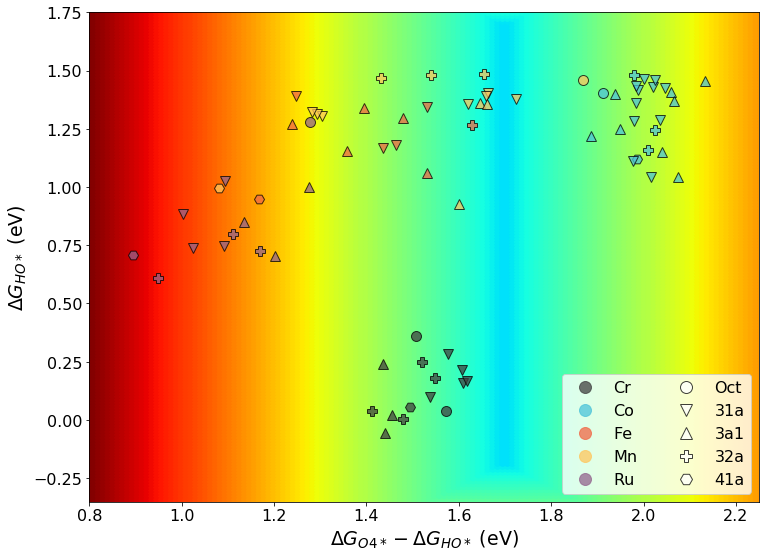

In [3]:

fig, ax = plt.subplots(figsize=(12,9))

plt.scatter(oer_descs, delgohs, c=ops, cmap='jet', vmin=0, vmax=1.37)#, vmin=0)

def get_op_conventionally(oer_descriptor):
    return max(oer_descriptor - 1.7, 1.7 - oer_descriptor) + 0.47

filtered_down = []
for name in oer_desc:
    if "hexa" in name_and_key or "penta" in name_and_key:
        continue
    color = ele2color[name[:2]]
    for key in geom2shape:
        if key in name:
            marker = geom2shape[key]
    if oer_desc[name]<1.6:
        filtered_down.append(name)
    all_binding_enes[name]["OH"]
    plt.plot(oer_desc[name], all_binding_enes[name]["OH"], color=color, marker=marker, markersize=10, 
            markeredgecolor='k', alpha=0.75)

    #plt.plot(oer_desc[name], -overpotential[name], color=color, marker=marker, markersize=10, alpha=0.75)

#plt.plot(1.23, 3.69, marker='*')
ax.legend(handles=custom_lgd, fontsize=16., ncol=2, loc='lower right')#, handletextpad=0)
plt.xlabel("$\Delta{G_{O4*} - \Delta{G_{HO*}}}$ (eV)", fontsize=19)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-0.35, 1.75)
plt.xlim(.8, 2.25)
plt.ylabel("$\Delta{G_{HO*}}}$ (eV)", fontsize=19)
plt.savefig("2d_volc_conventional.pdf")

In [4]:
all_binding_enes = pickle.load(open("/home/michael/PycharmProjects/gaussian_job_manage/binding_energies.p", "rb"))


from collections import defaultdict
new_oer_desc = defaultdict(float)
overpotential = defaultdict(float)
oh_binding = []
oh_binding_dict = defaultdict(float)
oxo_binding_dict = defaultdict(float)
oxo_binding = []
binding_names = []

for name_and_key in all_binding_enes:
    if all_binding_enes[name_and_key]['oxo5']!=0.0 and "Co" not in name_and_key:
        #print(all_binding_enes[name_and_key])
        if "Co" in name_and_key:
            print(all_binding_enes[name_and_key])
        new_oer_desc[name_and_key] = all_binding_enes[name_and_key]['oxo5']-all_binding_enes[name_and_key]['oxo']
        #overpotential[name_and_key] = max(all_binding_enes[name_and_key]['oxo']-all_binding_enes[name_and_key]['OH'],
        #                   all_binding_enes[name_and_key]['OOH']-all_binding_enes[name_and_key]['oxo'],
        #                   all_binding_enes[name_and_key]['OH'])-1.23
        
def get_new_volc_op(delgoh, delgoxo4, delgoxo5):
    return(max(delgoh, delgoxo4-delgoh, delgoxo5-delgoxo4, 3.4+0.9*delgoh-delgoxo5, 4.92-0.9*delgoh-3.4, 1.23)-1.23, delgoxo5-delgoxo4, delgoh)

delgoh = np.linspace(-.5, 2., 200)
nu_oer_desc = np.linspace(0, 2.5, 200)

oer_descs = []
delgohs = []
ops = []

for oh in delgoh:
    for n in nu_oer_desc:
        best_oxo4 = (3.4-n)/2 + oh
        oxo5 = best_oxo4+n
        op, nu_oer_d, delgoh = get_new_volc_op(oh, best_oxo4, oxo5)
        ops.append(op)
        oer_descs.append(nu_oer_d)
        delgohs.append(delgoh)
    

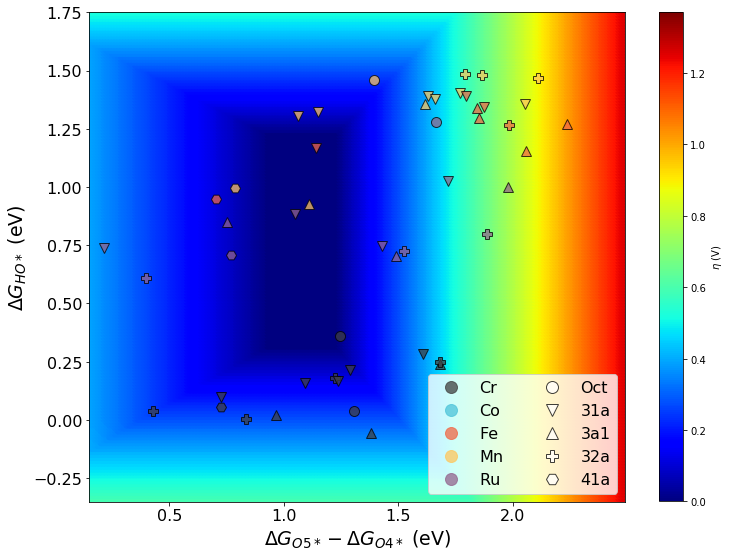

In [5]:

fig, ax = plt.subplots(figsize=(12,9))

plt.scatter(oer_descs, delgohs, c=ops, cmap='jet', vmin=0, vmax=1.37)#, vmin=0)


filtered_down = []
for name in new_oer_desc:
    if "Co" in name:
        print(all_binding_enes[name])
    if "hexa" in name or "penta" in name:
        continue
    color = ele2color[name[:2]]
    for key in geom2shape:
        if key in name:
            marker = geom2shape[key]
    plt.plot(new_oer_desc[name], all_binding_enes[name]["OH"], color=color, marker=marker, markersize=10, 
            markeredgecolor='k', alpha=0.75)

    #plt.plot(oer_desc[name], -overpotential[name], color=color, marker=marker, markersize=10, alpha=0.75)
plt.colorbar(label="$\eta$ (V)")
#plt.plot(1.23, 3.69, marker='*')
ax.legend(handles=custom_lgd, fontsize=16., ncol=2, loc='lower right')#, handletextpad=0)
plt.xlabel("$\Delta{G_{O5*} - \Delta{G_{O4*}}}$ (eV)", fontsize=19)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim(-0.35, 1.75)
plt.xlim(.15, 2.49)
plt.ylabel("$\Delta{G_{HO*}}}$ (eV)", fontsize=19)
plt.savefig("2d_volc_new.pdf")

In [6]:
all_binding_enes["Mn_hexa_1"]

defaultdict(float,
            {'OH': 1.2961968073641557,
             'oxo': 2.535795263291479,
             'oxo5': 4.482433800072341,
             'OOH': 4.722486496224373})